In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo


# Fetch the dataset
covertype = fetch_ucirepo(id=31)
X = covertype.data.features.to_numpy()
y = covertype.data.targets.to_numpy()

y = y.ravel() #Ensures that y is an 1-D array

# Splits the data into training and test set, statify=y makes sure that each splits cointains the same class distribution as the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Scaling the data using StandardScaler from Scikit-learn. 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define which parameters to use in the Grid Search
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_depth": [5,10,15],
    "min_samples_leaf": [10, 20, 30],
    "min_samples_split": [20, 30, 50],
    "class_weight": ["balanced"],
}


"This algorithm uses the Random Forest Classifier from Scikit-learn, and derives from the lecture notes from week 48."

# The grid search
Grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=param_grid,
    scoring="f1_weighted", 
    cv=StratifiedKFold(n_splits=5), # Number of CV-folds.
    n_jobs=-1,
)

The results from the grid search was: 

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 20}
Best Accuracy: 0.8087


Classification Report on test data:
              precision    recall  f1-score   support

           1       0.83      0.83      0.83     42368
           2       0.90      0.77      0.83     56661
           3       0.82      0.85      0.83      7151
           4       0.59      0.96      0.73       549
           5       0.29      0.94      0.45      1899
           6       0.59      0.89      0.71      3473
           7       0.75      0.98      0.85      4102

    accuracy                           0.81    116203
   macro avg       0.68      0.89      0.75    116203
weighted avg       0.84      0.81      0.82    116203


Classification Report on train data:
              precision    recall  f1-score   support

           1       0.84      0.84      0.84    169472
           2       0.90      0.78      0.84    226640
           3       0.83      0.87      0.85     28603
           4       0.62      0.99      0.77      2198
           5       0.30      0.98      0.46      7594
   

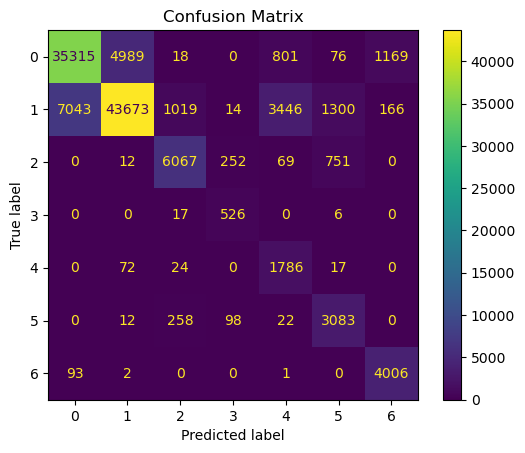

In [ ]:
"The predictions and classification report for training data and test data was included to identify if the model was overfitting"

# Fit the model to the best parameters
Grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {Grid_search.best_params_}")
print(f"Best Accuracy: {Grid_search.best_score_:.4f}")

# Use the parameters from the grid search
best_model = Grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions based on test and training data. 
y_test_pred = best_model.predict(X_test_scaled)
y_train_pred = best_model.predict(X_train_scaled)

# Print the classification report for the predictions. 
print("\nClassification Report on test data:")
print(classification_report(y_test, y_test_pred))
print("\nClassification Report on train data:")
print(classification_report(y_train, y_train_pred))

# Plots the Confusion Matrix from Skicit-learn
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()
